# Using James Tan and Thomas Chambon work, we can easily get Data (THANKS GUYS!!! :))

Going to test our binary classification on the satellite images to reflect the presence and absence of rice crops. 

Data can be found at:  https://drive.google.com/open?id=1HZBJsVfDDQ8nAFIDZrRIW04hdthmY0Ns

In [0]:
!pip install fastprogress
!wget -O gdrive https://docs.google.com/uc?id=0B3X9GlR6EmbnWksyTEtCM0VfaFE&export=download 
!chmod +x gdrive
!sudo install gdrive /usr/local/bin/gdrive


--2019-07-08 19:43:14--  https://docs.google.com/uc?id=0B3X9GlR6EmbnWksyTEtCM0VfaFE
Resolving docs.google.com (docs.google.com)... 172.217.212.102, 172.217.212.138, 172.217.212.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.212.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-48-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/50a5ri2ofqlunrhc4lj5l7st32mboff6/1562608800000/15876260727594163214/*/0B3X9GlR6EmbnWksyTEtCM0VfaFE [following]
--2019-07-08 19:43:14--  https://doc-0c-48-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/50a5ri2ofqlunrhc4lj5l7st32mboff6/1562608800000/15876260727594163214/*/0B3X9GlR6EmbnWksyTEtCM0VfaFE
Resolving doc-0c-48-docs.googleusercontent.com (doc-0c-48-docs.googleusercontent.com)... 173.194.198.132, 2607:f8b0:4001:c1c::84
Connecting to doc-0c-48-docs.googleusercontent.com (doc-0c-48-docs.googleusercontent.com)|173.194.198.132|:443.

In [0]:
from matplotlib.pyplot import imshow
from pathlib import Path
from tqdm import tqdm
import numpy as np
from os import scandir, walk, remove
import pandas as pd
from fastprogress import progress_bar
from fastai import *
from fastai.vision import *
from PIL import Image


In [0]:
## Execute olny once if files saved to GDrive storage

#Guess where did I get this from (hint its somewhere up there)
!gdrive download 1HZBJsVfDDQ8nAFIDZrRIW04hdthmY0Ns

In [0]:
%cd /content
!unzip WFP_Nepal_RGB-Scale3.5_PNG.zip
%rm -rf /content/__MACOSX

In [0]:
def center_crop(img, new_width=64, new_height=None):        
    width = img.width
    height = img.height

    if new_height is None:
        new_height = new_width

    left = int(np.ceil((width - new_width) / 2))
    right = width - int(np.floor((width - new_width) / 2))

    top = int(np.ceil((height - new_height) / 2))
    bottom = height - int(np.floor((height - new_height) / 2))
   
    center_cropped_img = img.crop((left, top, right, bottom))
    assert((center_cropped_img.height == new_height) and (center_cropped_img.width == new_width))

    return center_cropped_img

def crop_on_img(filename, path_target, size=41):
    img = Image.open(filename)
    img = center_crop(img, size, size)
    img.save(path_target+filename.stem+'.png')

In [0]:
def do(file,i):
  crop_on_img(file, path_target, 512)

In [0]:
LAUNCH = True
# Path where your downloaded data is
path_source = '/content/WFP_Nepal_RGB-Scale3.5_PNG/'
# Target path of resized data
#path_target = '/content/drive/My Drive/Omdena_code/NepalImages/CenteredCropped/'

## problems with google drive so Center&cropp on virtual. Then copy.
#%rm -rf '/content/WFP_Nepal_RGB-Scale3.5_PNG/'
%mkdir -p /content/WFP_Nepal_RGB-Scale3.5_PNG/CenteredCropped
path_target = '/content/WFP_Nepal_RGB-Scale3.5_PNG/CenteredCropped/'


files = ImageList.from_folder(path_source).items

## compute (crop/center) our files
parallel(do,files)

# Import necessary libraries (also tensorflow v. 2.0 )

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
# read files and directory structure, 
# numpy is used to convert python list to numpy array and to perform required matrix operations and 
# matplotlib.pyplot is used to plot the graph and display images in our training and validation data.
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

In [0]:
# upgrade to TF 2.0 with GPU support and import TF 
!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf

print(tf.__version__)
print("GPU Available: ", tf.test.is_gpu_available())

     |████████████████████████████████| 348.9MB 84kB/s 
     |████████████████████████████████| 3.1MB 51.7MB/s 
     |████████████████████████████████| 501kB 1.9MB/s 
2.0.0-beta1
GPU Available:  True


In [0]:
tf.debugging.set_log_device_placement(True)

# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
print("keras veersion", tf.keras.__version__)
from keras.preprocessing.image import ImageDataGenerator

keras veersion 2.2.4-tf


Using TensorFlow backend.


# Get data description file

In [0]:
# download data labels and descriptors
!gdrive download 1AU7pZVL5xDotl13jCaoT7a2xwZUZfiT2

Downloaded 1AU7pZVL5xDotl13jCaoT7a2xwZUZfiT2 at 726.0 KB/s, total 726.0 KB


In [0]:
trn_val = pd.read_csv("train_test_split.csv")

In [0]:
print(path_target)

/content/WFP_Nepal_RGB-Scale3.5_PNG/CenteredCropped/


In [0]:
print(trn_val)

       Unnamed: 0                                             fname  is_val_set
0               0      rice_Oct16_84-28306358_27-59084298_img_0.png       False
1               1        rice_Oct16_84-526036_27-60306972_img_2.png       False
2               2       rice_Aug16_84-5499051_27-66798481_img_0.png        True
3               3     other_Oct16_84-52634599_27-58503432_img_1.png       False
4               4       other_Nov16_84-5851412_27-6099488_img_4.png       False
5               5      other_Nov16_84-25636492_27-5949023_img_0.png       False
6               6      rice_Feb17_85-64941639_27-56884986_img_2.png       False
7               7      other_Nov16_84-6021897_27-58628348_img_1.png        True
8               8     other_Jan17_85-72360112_27-43425935_img_1.png       False
9               9      rice_Oct16_84-54014659_27-65430335_img_0.png       False
10             10      other_Aug16_84-6216815_27-63639669_img_2.png        True
11             11      rice_Mar17_85-537

In [0]:
trn_val_dict = {row.fname: row.is_val_set for _, row in trn_val.iterrows()}

In [0]:
print(trn_val_dict)

{'rice_Oct16_84-28306358_27-59084298_img_0.png': False, 'rice_Oct16_84-526036_27-60306972_img_2.png': False, 'rice_Aug16_84-5499051_27-66798481_img_0.png': True, 'other_Oct16_84-52634599_27-58503432_img_1.png': False, 'other_Nov16_84-5851412_27-6099488_img_4.png': False, 'other_Nov16_84-25636492_27-5949023_img_0.png': False, 'rice_Feb17_85-64941639_27-56884986_img_2.png': False, 'other_Nov16_84-6021897_27-58628348_img_1.png': True, 'other_Jan17_85-72360112_27-43425935_img_1.png': False, 'rice_Oct16_84-54014659_27-65430335_img_0.png': False, 'other_Aug16_84-6216815_27-63639669_img_2.png': True, 'rice_Mar17_85-53799504_27-56916064_img_0.png': False, 'rice_Mar17_84-19713364_27-59366022_img_1.png': False, 'other_Oct16_84-68641427_27-68245071_img_3.png': False, 'rice_Oct16_84-37956552_27-59176428_img_0.png': False, 'rice_Mar17_84-38279272_27-60176285_img_0.png': True, 'other_Nov16_84-5851412_27-6099488_img_3.png': False, 'rice_Oct16_84-3995528_27-59626195_img_0.png': True, 'rice_Feb17_85-54

In [0]:
import re
pat = '^rice_'

def is_rice(fname):
  if re.search(pat,fname.stem): return True
  return False

In [0]:
def get_split(fname):
#   return trn_val.loc[trn_val['fname'] == fname.name]['is_val_set'].values[0]
  print(fname.name)
  return trn_val_dict[fname.name]

In [0]:
# load data sets
src = (ImageList.from_folder(Path(path_target))
        .split_by_valid_func(get_split)
        .label_from_func(is_rice)
      )
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
data = (src.transform(tfms,size=224)
        .databunch(bs=40)
        .normalize(imagenet_stats)
       )

rice_Mar17_84-24244053_27-60358185_img_0.png
other_Oct16_84-59711305_27-58177851_img_3.png
other_Aug16_84-23672198_27-5706473_img_2.png
other_Oct16_84-58282256_27-71821198_img_0.png
other_Nov16_84-32943294_27-56782278_img_3.png
other_Aug16_84-23741007_27-60215249_img_0.png
rice_Nov16_84-36765397_27-59654735_img_3.png
rice_Nov16_84-37790369_27-59250812_img_5.png
rice_Aug16_84-3844222_27-60183_img_0.png
other_Aug16_84-26729258_27-62213752_img_0.png
other_Feb17_85-68534527_27-51515758_img_1.png
other_Aug16_84-55184462_27-58233658_img_2.png
rice_Jan17_84-60540838_27-61033038_img_0.png
other_Dec16_85-71176127_27-4386391_img_0.png
other_Oct16_84-60156379_27-62688724_img_2.png
rice_Nov16_84-52646644_27-58643429_img_3.png
rice_Mar17_84-32321269_27-61430829_img_0 (1).png
other_Mar17_84-53972319_27-62709296_img_0.png
rice_Mar17_85-46296501_27-60753893_img_1.png
other_Jan17_84-76297957_27-65687339_img_0.png
other_Oct16_84-58669138_27-61002529_img_2.png
other_Feb17_84-42177843_27-66416184_img_0.pn

# ImageNet pretrainet (PyTorch implementation)

In [0]:
!pip install pretrainedmodels

     |████████████████████████████████| 61kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built pretrainedmodels munch


In [0]:
import pretrainedmodels

In [0]:
print(pretrainedmodels.model_names)

['fbresnet152', 'bninception', 'resnext101_32x4d', 'resnext101_64x4d', 'inceptionv4', 'inceptionresnetv2', 'alexnet', 'densenet121', 'densenet169', 'densenet201', 'densenet161', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'inceptionv3', 'squeezenet1_0', 'squeezenet1_1', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19_bn', 'vgg19', 'nasnetamobile', 'nasnetalarge', 'dpn68', 'dpn68b', 'dpn92', 'dpn98', 'dpn131', 'dpn107', 'xception', 'senet154', 'se_resnet50', 'se_resnet101', 'se_resnet152', 'se_resnext50_32x4d', 'se_resnext101_32x4d', 'cafferesnet101', 'pnasnet5large', 'polynet']


In [0]:
print(pretrainedmodels.pretrained_settings['inceptionv3'])

{'imagenet': {'url': 'https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth', 'input_space': 'RGB', 'input_size': [3, 299, 299], 'input_range': [0, 1], 'mean': [0.5, 0.5, 0.5], 'std': [0.5, 0.5, 0.5], 'num_classes': 1000}}


In [0]:
# - `inceptionresnetv2(num_classes=1000, pretrained='imagenet')`
# - `inceptionresnetv2(num_classes=1001, pretrained='imagenet+background')`
# - `inceptionv4(num_classes=1000, pretrained='imagenet')`
# - `inceptionv4(num_classes=1001, pretrained='imagenet+background')`
# - `inceptionv3(num_classes=1000, pretrained='imagenet')`

In [0]:
import torch
import pretrainedmodels.utils as utils


In [0]:
model = pretrainedmodels.__dict__['inceptionv4'](num_classes=1000, pretrained='imagenet')
model.eval()

Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/inceptionv4-8e4777a0.pth" to /root/.cache/torch/checkpoints/inceptionv4-8e4777a0.pth
100%|██████████| 171082495/171082495 [08:01<00:00, 355276.20it/s]


InceptionV4(
  (features): Sequential(
    (0): BasicConv2d(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
    )
    (1): BasicConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
    )
    (2): BasicConv2d(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
    )
    (3): Mixed_3a(
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (conv): BasicConv2d(
        (conv): Conv2d(64, 96, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.1, aff

In [0]:
def f1_score(y_pred:Tensor, y_true:Tensor,beta:float=1, eps:float=1e-9)->Rank0Tensor:
    "Computes the f_beta between `preds` and `targets`"
    beta2 = beta ** 2

    y_pred = y_pred.argmax(dim=1).float()
    y_true = y_true.float()
    
    TP = (y_pred*y_true).sum()
    prec = TP/(y_pred.sum()+eps)
    rec = TP/(y_true.sum()+eps)
    res = (prec*rec)/(prec*beta2+rec+eps)*(1+beta2)
    return res.mean()

In [0]:
learn = Learner(data, model, metrics=[accuracy, f1_score])

In [0]:
groups = [nn.Sequential(*list(model.children())[:-3]),nn.Sequential(*list(model.children())[-3:])]

In [0]:
learn.layer_groups = groups

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.45E-03
Min loss divided by 10: 1.32E-01


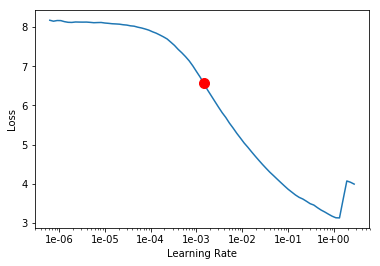

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
groups = [nn.Sequential(*list(model.children())[:-3]),nn.Sequential(*list(model.children())[-3:])]

In [0]:
learn.layer_groups = groups

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.45E-03
Min loss divided by 10: 4.37E-02


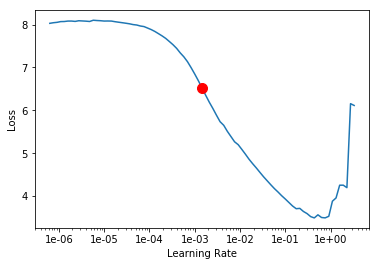

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(2,3.6e-3)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.671353,0.700859,0.556362,0.257778,05:23
1,0.590925,0.602735,0.666030,0.579012,05:09


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.25E-01
Min loss divided by 10: 6.31E-08


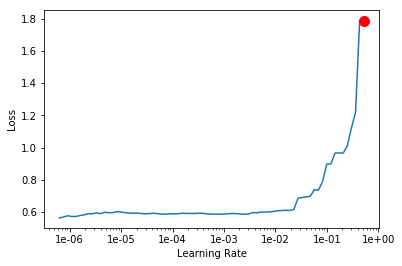

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(5,2e-4)

NameError: ignored

In [0]:
learn.save('v4_1')

In [0]:
learn.unfreeze()
learn.data.batch_size =learn.data.batch_size //2

In [0]:
learn.fit_one_cycle(5,slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.519874,0.572410,0.698510,0.629823,05:20
1,0.509854,0.555594,0.706152,0.651102,05:12
2,0.501781,0.551372,0.714941,0.661634,05:07
3,0.478386,0.552571,0.717233,0.666631,05:03
4,0.473353,0.554625,0.716087,0.660761,05:02


In [0]:
learn.save('v4_2')

In [0]:
learn.fit_one_cycle(5,slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.483399,0.553539,0.714941,0.660034,05:00
1,0.469219,0.554577,0.716087,0.663923,05:12
2,0.467635,0.552887,0.720673,0.669586,05:10
3,0.457789,0.553119,0.723347,0.675448,05:00
4,0.478021,0.555716,0.716851,0.664902,05:00


In [0]:
learn.save('v4-3')